In [41]:
import numpy as np

In [42]:
from matplotlib import pyplot as plt

In [43]:
%matplotlib inline

# Data

In [44]:
# x,y ,bias
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1,6,-1],
    [2,4,-1],
    [6,2,-1],
])

In [45]:
# Associated output label
y = np.array([-1,-1,1,1,1])

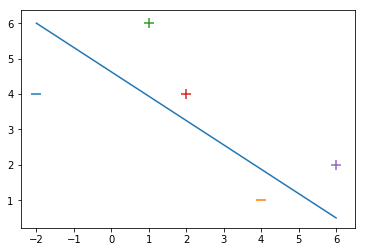

In [46]:
# Plotin this exemple in 2D graph
# For eache exwmple
for d, sample in enumerate(X):
    # plot the negative sample (-2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker="_", linewidths=2)
    # PLot the positive sample (3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker="+", linewidths=2)
        
plt.plot([-2,6],[6,0.5])

In [47]:
def svn_sgd_plot(X,Y):
    # init the SVMs weight vwtors with 0
    w = np.zeros(len(X[0]))
    # Learnig rate
    eta = 1
    # Interactions to train for
    epochs = 100000
    # Store the misclassification
    errors = []
    
    # Training part, gradient descent
    for epoch in range(1, epochs):
        error = 0
        for i, x in enumerate(X):
            # Missclassification
            if (Y[i]*np.dot(X[i],w)) < 1:
                # Misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) +(-2 * (1/epoch) * w))
                error = 1
            else:
                # Correct classification, update weights
                w = w + eta * (-2 * (1/epoch) * w)
        errors.append(error)
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    #plt.axes().set_ytickables([])
    plt.xlabel('Epoch')
    plt.ylabel('Missclassification')
    plt.show()
    
    return w

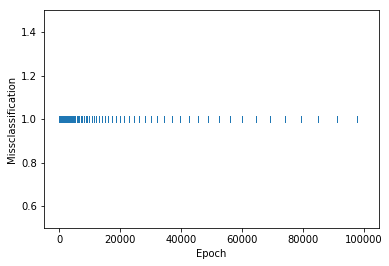

In [48]:
w = svn_sgd_plot(X,y)


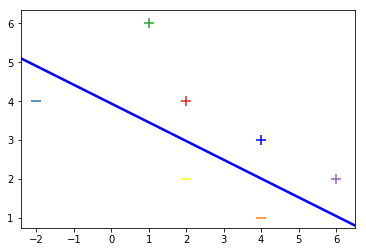

In [49]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')